### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [49]:
populacao_estados = pd.read_excel('/content/drive/MyDrive/Alura/dados/POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [50]:
populacao_estados.groupby('UF').sum()

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [51]:
# populacao_estados['POPULAÇÃO'].astype(int)

ValueError: ignored

In [52]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [55]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x: x.loc[:,'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [56]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [57]:
populacao_estados.loc[:,'populacao'] = populacao_estados['populacao'].astype(int)

In [58]:
populacao_estados = populacao_estados.groupby('UF').sum()['populacao'].reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [59]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado').sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [61]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

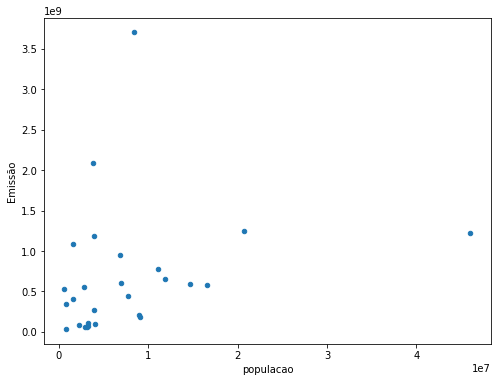

In [62]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [63]:
import plotly.express as px

In [64]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [65]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [66]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [67]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', size = 'emissao_per_capita')